In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Defining Problem

Predicting salary based off education, experience, and salary so that we can make informed decisions when sending an offer, or for a client to be able to negotiate fairly.

## Data Importing and Cleaning

In [2]:
# Importing Data
train_f = pd.read_csv('data/train_features.csv')
train_s = pd.read_csv('data/train_salaries.csv')
test = pd.read_csv('data/test_features.csv')

In [3]:
train_f.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
# Creating one train dataframe
df = pd.merge(train_f, train_s, 'inner', on = 'jobId')

In [5]:
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [6]:
# Taking a quick look at the data, there are some salaries = 0, so lets check them out
df.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [7]:
# Checking if experience and salaries match up
df[df['salary'] == 0]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


There is only one jobId where the salary is 0 and minimal experience, so I will assume that these are errors, and will delete them from the dataframe.

In [8]:
df = df[df['salary'] > 0]

Exploring data outside 95% (2 standard deviations)

In [9]:
describe = df.describe()
low = df.salary.mean() - 2 * describe['salary']['std']
high = df.salary.mean() + 2 * describe['salary']['std']

In [10]:
outside_std = df[(df['salary'] > high) | (df['salary'] < low)]

In [11]:
# Checking mean salaries per group. Makes sense with oil, health, and finance being the highest paid. These values
# seem to be correct.
ind = outside_std.groupby('industry')
for i in set(df.industry):
    print(i, ind.get_group(i).salary.mean())

OIL 212.78215164392753
EDUCATION 62.277827248441675
WEB 205.6140350877193
SERVICE 94.8919760479042
AUTO 140.69746524938677
HEALTH 185.58619842829077
FINANCE 212.17384877771462


### Visualizing Trends

In [37]:
numeric = ['yearsExperience', 'milesFromMetropolis']
categorical = ['jobType', 'degree', 'major', 'industry']

In [52]:
def plot_feature(df, col):
    '''
    Make plot for each features
    left, the distribution of samples on the feature
    right, the dependance of salary on the feature
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[col].dtype == 'int64' or col == 'companyId':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'salary', data=df)
    
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.show()

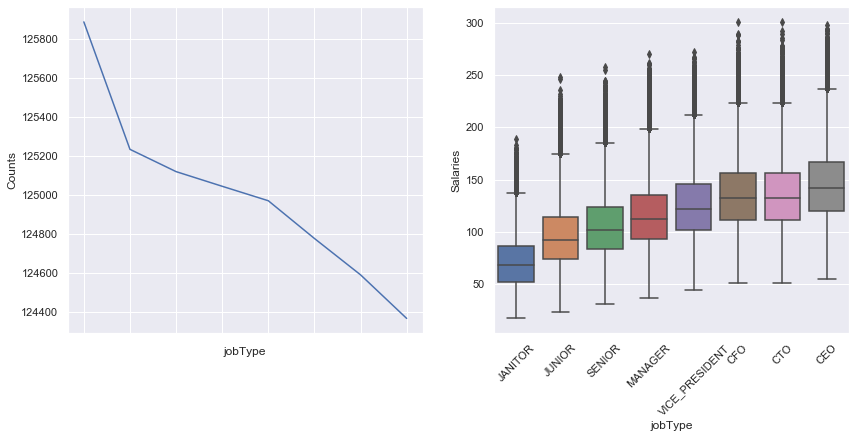

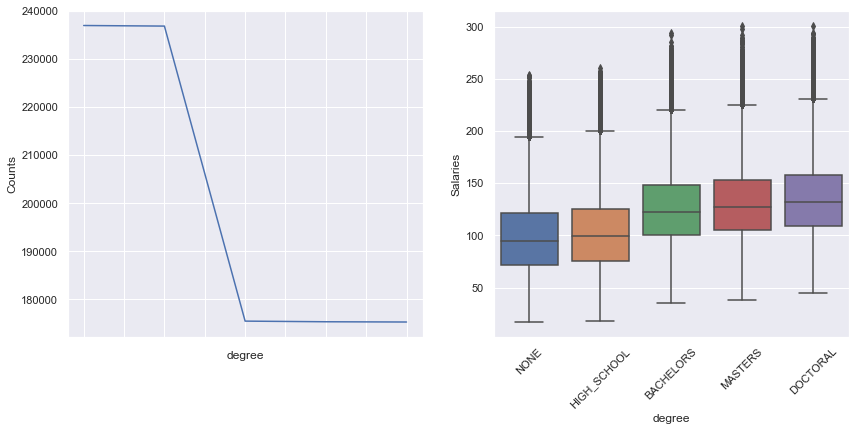

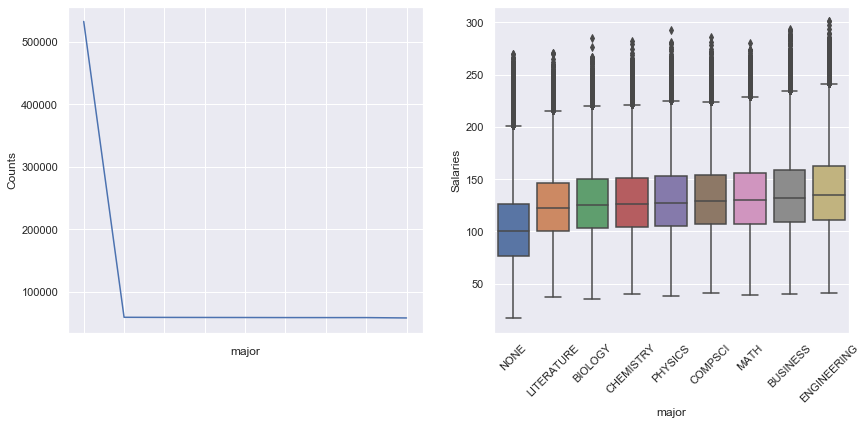

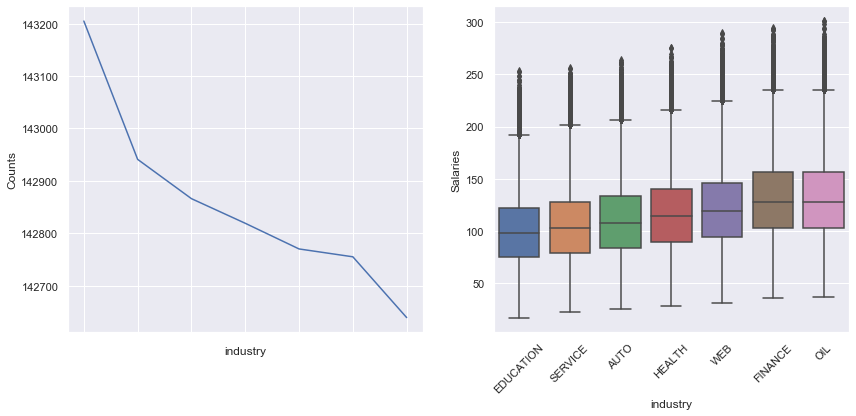

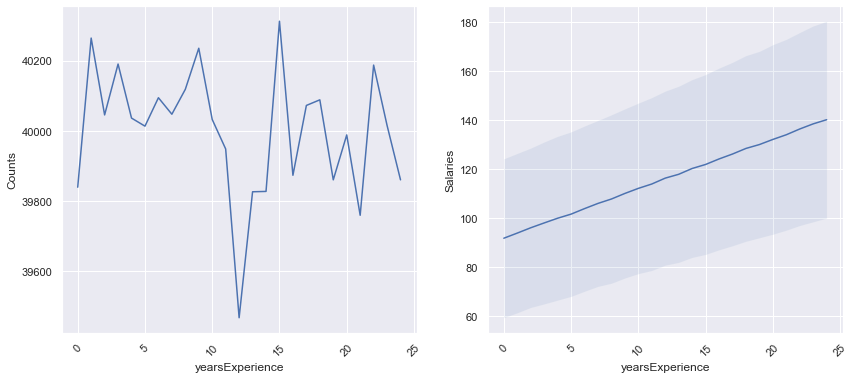

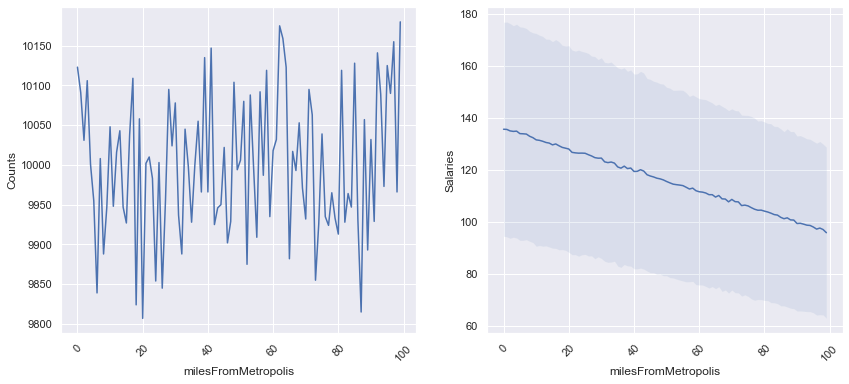

In [55]:
for i in categorical + numeric:
    plot_feature(df, i)

### Examining feature and salary correlation

In [ ]:
train_df = pd.merge(train_f, train_s, on='jobId').drop(['jobId', 'companyId'], axis = 1)

In [ ]:
cat_df